In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [2]:
geom = ase.io.read("./xyz_files//triangulene.xyz")
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])

In [12]:
chemical_potential = 0.8125

In [13]:
f = open("triangulene_ev.txt","r")
#print(f.readline())

num_lines = sum(1 for line in open('triangulene_ev.txt', "r"))
print(num_lines)
num_values_evecs = int(num_lines / 2)

evals = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0


evals_up = np.zeros(22, dtype=float)
evals_down = np.zeros(22, dtype=float)
counter_up = 0
counter_down = 0
    
    
counter = 0
word_count = 0
for line in f:
    #if(counter == 39):
     #   print("Line: " + str(counter))
      #  print(line[:3])
       # print(line)
        
    spin = line[:2]

    line = line[3:]

    splitted_line = line.split(' ')

    evals[counter] = np.float64(splitted_line[0])
    
    if(spin == 'su'):
        evals_up[counter_up] = evals[counter] - chemical_potential
        counter_up = counter_up + 1
    if(spin == 'sd'):
        evals_down[counter_down] = evals[counter] - chemical_potential
        counter_down = counter_down + 1
    
    #print("spin: " + str(spin) + "\teval: " + str(evals[counter]))
    splitted_line.pop(0)
    
    x = ''
    y = ''
    y_turn = False
    
    for j in range(len(splitted_line)):    
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    word_count = 0
    counter = counter + 1
    
    if(spin == 'su'):
        if(chemical_potential > evals[counter-1]):
            up_spins = up_spins + 1
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter-1]))
    if(spin == 'sd'):
        if(chemical_potential > evals[counter-1]):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter-1]))

print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_down - total_spin_up))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

44
total up spins: 10
total down spins: 12
[0.54820343+0.j 0.36330484+0.j 0.56192406+0.j 0.36330442+0.j
 0.54820488+0.j 0.44338797+0.j 0.32420143+0.j 0.36328948+0.j
 0.54821115+0.j 0.32420231+0.j 0.54820622+0.j 0.44338488+0.j
 0.54241274+0.j 0.54820762+0.j 0.36329796+0.j 0.56193198+0.j
 0.36329869+0.j 0.44338171+0.j 0.54821111+0.j 0.32420196+0.j
 0.36328947+0.j 0.56194247+0.j]
[0.4517962 +0.j 0.63669571+0.j 0.43807615+0.j 0.63669589+0.j
 0.45179516+0.j 0.55661289+0.j 0.67579898+0.j 0.63671042+0.j
 0.451789  +0.j 0.67579707+0.j 0.45179335+0.j 0.55661466+0.j
 0.45758759+0.j 0.45179218+0.j 0.6367022 +0.j 0.43806823+0.j
 0.63670203+0.j 0.55661895+0.j 0.4517892 +0.j 0.67579828+0.j
 0.63671101+0.j 0.438058  +0.j]
(22,)
[-0.09640723+0.j  0.27339086+0.j -0.12384791+0.j  0.27339147+0.j
 -0.09640972+0.j  0.11322493+0.j  0.35159755+0.j  0.27342094+0.j
 -0.09642215+0.j  0.35159476+0.j -0.09641286+0.j  0.11322978+0.j
 -0.08482515+0.j -0.09641544+0.j  0.27340425+0.j -0.12386375+0.j
  0.27340333+0.j 

In [14]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

44 22


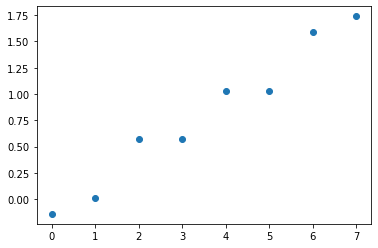

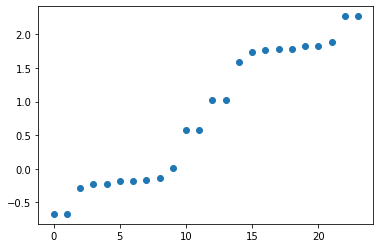

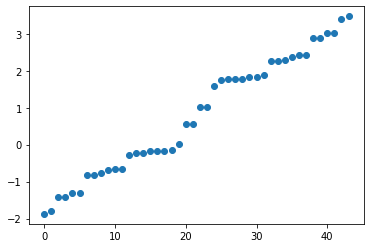

-0.140085
0.00763949
0.570624
0.570639
1.02936
1.02938
1.59236
1.74008


In [15]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()


for ev in evals[ed-4:ed+4]:
    print(ev)



In [42]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=3.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

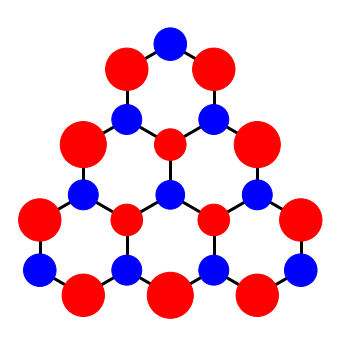

In [43]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.savefig("./figures/figures_trian/spin_diff.png", dpi=500, bbox_inches='tight')

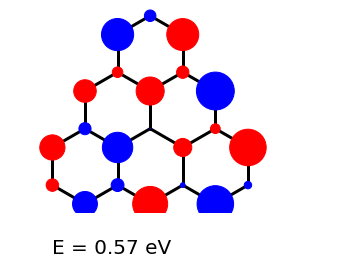

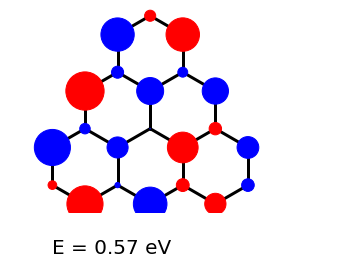

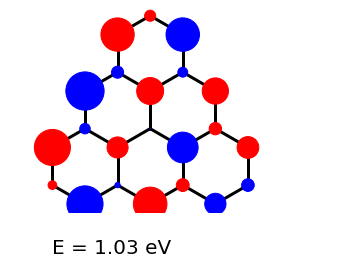

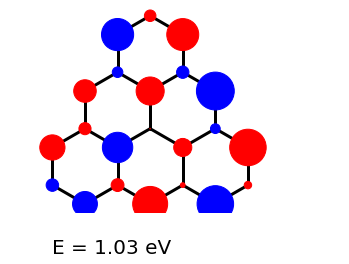

In [18]:
for ind in range(ed-2,ed+2):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-2.0
    xmax = np.max(geom.positions[:, 0])+2.0
    ymin = np.min(geom.positions[:, 1])-2.0
    ymax = np.max(geom.positions[:, 1])+4.0
    plt.xlim([xmin, xmax])
    plt.xlim([ymin, ymax])
    plt.text(xmin+2.0, ymin, "E = %.2f eV" % evals[ind], fontsize=20)
    plt.savefig("./figures/figures_trian/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

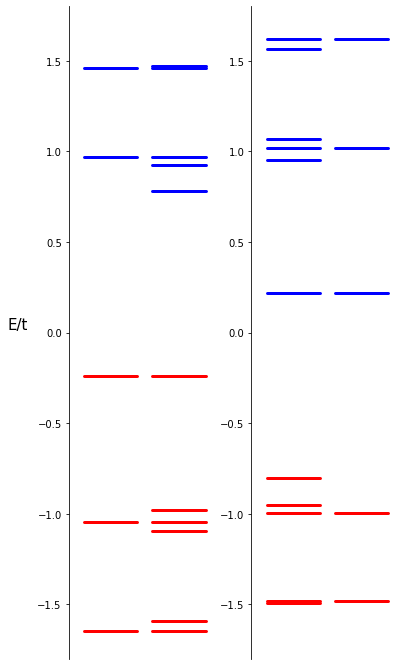

In [39]:
chemical_potential = 0.625
past_ev = -100


fig = plt.figure(figsize=(6, 12))
plt.subplot(121)
ax = plt.gca()
for ev in evals_down:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        #print("Down spin ev: " + str(ev))
    if(ev > past_ev + 0.001):
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev


ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)
plt.ylabel("E/t", rotation=0, fontsize=15, labelpad=20)

#plt.text(0.5, -1.9, 'Parameters: t = 1.0, H = 1.6, initial density value = 1.0', ha='center', va='center')

###

plt.subplot(122)
ax = plt.gca()
for ev in evals_up:
    
    col = 'blue'
    if ev < 0.0:
        col = 'red'
        #print("Up spin ev: " + str(ev))
    if(ev > past_ev + 0.001):
        plt.plot([0.1, 0.45], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    else:
        plt.plot([0.55, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    past_ev = ev
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-1.8, 1.8)

#plt.ylabel("Energy (eV)")

plt.savefig("./figures/figures_trian/spin_eigenvalues.png", dpi=500, bbox_inches='tight')



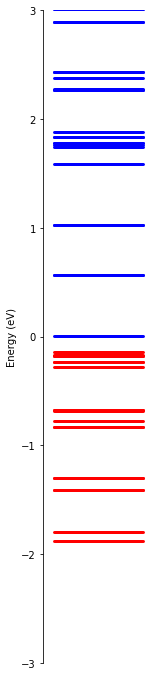

In [20]:
fig = plt.figure(figsize=(2, 12))
ax = plt.gca()
for ev in evals[ed-ed:ed*2]:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
    plt.plot([0.1, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-3.0, 3.0)
plt.ylabel("Energy (eV)")
plt.savefig("./levels.png", dpi=300, bbox_inches='tight')